## User Data

In [1]:
user_data = sc.textFile("/home/rsk/Documents/Spark/ml-100k/u.user")

In [2]:
user_data.take(3)

[u'1|24|M|technician|85711', u'2|53|F|other|94043', u'3|23|M|writer|32067']

In [3]:
user_fields = user_data.map(lambda line : line.split("|"))
num_users = user_fields.map(lambda fields : fields[0]).count()

In [6]:
num_genders = user_fields.map(lambda fields :fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields :fields[3]).distinct().count()

In [7]:
num_zipcodes = user_fields.map(lambda fields : fields[4]).distinct().count()

In [9]:
print "Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_users, num_genders, num_occupations, num_zipcodes)

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


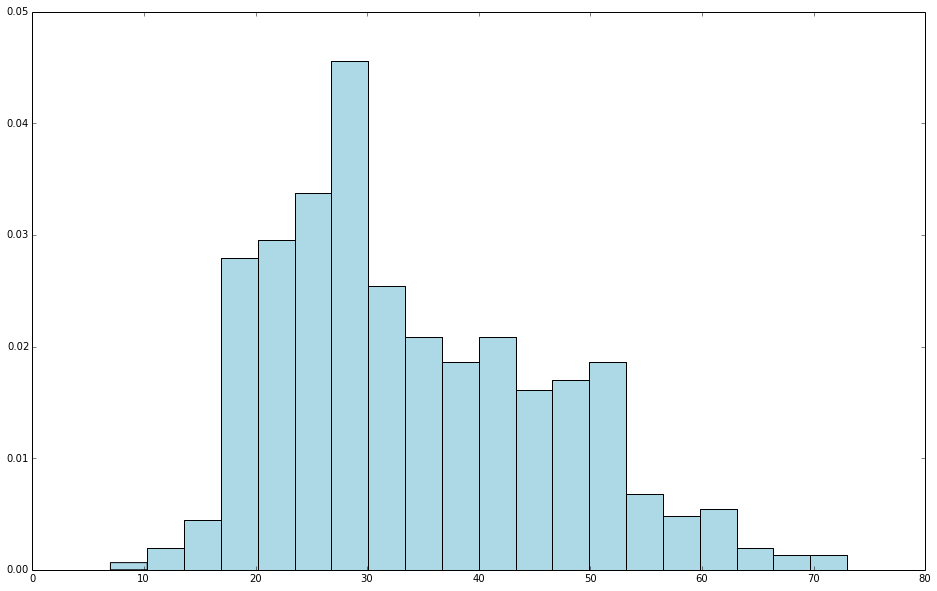

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

ages = user_fields.map(lambda x : int(x[1])).collect()
plt.hist(ages,bins=20,color='lightblue',normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16,10)

In [15]:
import numpy as np
count_by_occupation = user_fields.map(lambda fields : (fields[3],1)).reduceByKey(lambda a,b : a+b).collect()
x = np.array([c[0] for c in count_by_occupation])
y = np.array([c[1] for c in count_by_occupation])

x = x[np.argsort(y)]
y = y[np.argsort(y)]

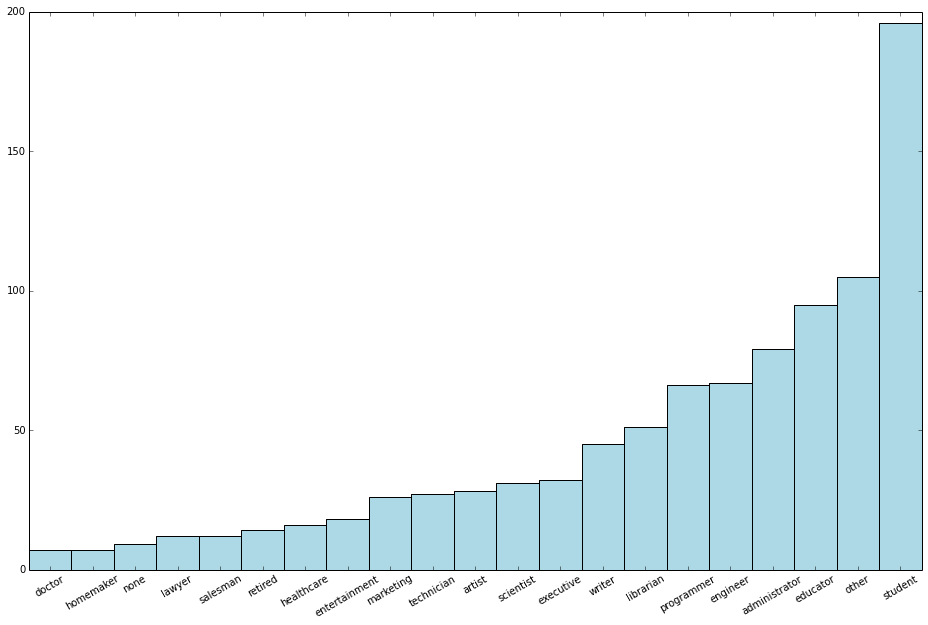

In [17]:
pos = np.arange(len(x))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x)
plt.bar(pos, y, width, color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

### countByValue()

In [18]:
count_by_occupation2 = user_fields.map(lambda x: x[3]).countByValue()

In [20]:
count_by_occupation2

defaultdict(int,
            {u'administrator': 79,
             u'artist': 28,
             u'doctor': 7,
             u'educator': 95,
             u'engineer': 67,
             u'entertainment': 18,
             u'executive': 32,
             u'healthcare': 16,
             u'homemaker': 7,
             u'lawyer': 12,
             u'librarian': 51,
             u'marketing': 26,
             u'none': 9,
             u'other': 105,
             u'programmer': 66,
             u'retired': 14,
             u'salesman': 12,
             u'scientist': 31,
             u'student': 196,
             u'technician': 27,
             u'writer': 45})

## Movie data

In [38]:
movieData = sc.textFile("/home/rsk/Documents/Spark/ml-100k/u.item")
print movieData.first()

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0


In [39]:
numMovies = movieData.count()
print "number of movies : %d " % numMovies

number of movies : 1682 


In [40]:
def convert_year(x):
    try:
        return int(x[-4:])
    except:
        return 1900
    #there is a 'bad' data point with a blank year,which we set to 1900 and will filter out later


In [41]:
movieData = movieData.map(lambda x : x.split("|"))
years = movieData.map(lambda x : x[2]).map(lambda x : convert_year(x))

In [43]:
years.first()

1995

In [44]:
years_filtered = years.filter(lambda x : x != 1900)

In [57]:
maxYear = years_filtered.max()
print "max year is : %d " % maxYear

max year is : 1998 


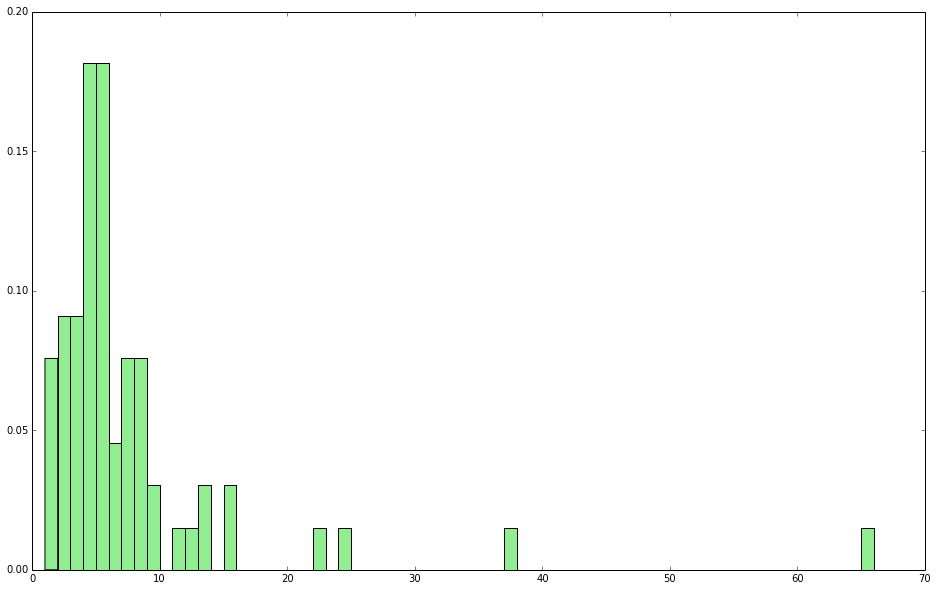

In [53]:
movieAges = years_filtered.map(lambda yr : 1999-yr).countByValue()
values = movieAges.values()
bins = movieAges.keys()

plt.hist(values,bins=bins,color='lightgreen',normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16,10)

## Ratings data

In [68]:
ratingsData = sc.textFile("/home/rsk/Documents/Spark/ml-100k/u.data")
print ratingsData.first()

196	242	3	881250949


In [69]:
print "Number of ratings : %d" % ratingsData.count()

Number of ratings : 100000


In [70]:
ratingsData.first()

u'196\t242\t3\t881250949'

In [71]:
ratingsData = ratingsData.map(lambda x : x.split("\t"))
ratings = ratingsData.map(lambda x : int(x[2]))

maxRating = ratings.reduce(lambda x,y : max(x,y))
minRating = ratings.reduce(lambda x,y : min(x,y))
meanRating = ratings.reduce(lambda x,y : x+ y) / ratingsData.count()
medianRating = np.median(ratings.collect())

ratingsPerUser = ratingsData.count()/num_users
ratingsPerMovie = ratingsData.count()/numMovies

In [72]:
ratings.max()

5

In [73]:
print "Min rating: %d" % minRating
print "Max rating: %d" % maxRating
print "Average rating: %2.2f" % meanRating
print "Median rating: %d" % medianRating
print "Average # of ratings per user: %2.2f" % ratingsPerUser
print "Average # of ratings per movie: %2.2f" % ratingsPerMovie

Min rating: 1
Max rating: 5
Average rating: 3.00
Median rating: 4
Average # of ratings per user: 106.00
Average # of ratings per movie: 59.00


stats() function for numeric variable

In [74]:
ratings.stats()

(count: 100000, mean: 3.52986, stdev: 1.12566797076, max: 5.0, min: 1.0)